Поиск минимума функции методом деления пополам, методом золотого сечения, метод Фибоначчи

In [1]:
import Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [2]:
using Plots
f(x) = x^4 + 8*x^3 - 6*x^2 - 72*x

f (generic function with 1 method)

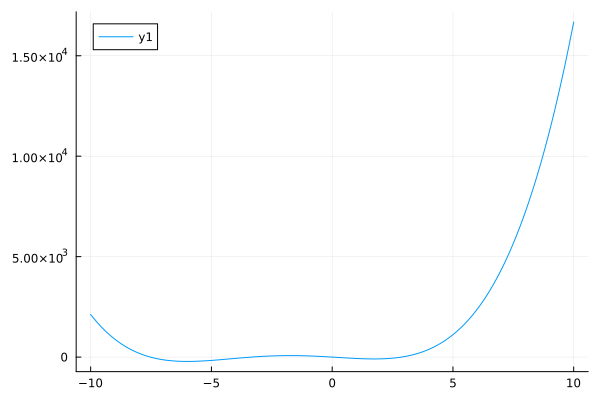

In [3]:
x_vals = -10:0.1:10
y_vals = f.(x_vals)

Plots.plot(x_vals, y_vals)

In [4]:
Pkg.add("Roots")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [5]:
using Roots
    
function is_unimodal(f, a, b)
    f_deriv(x) = 4*x^3 + 24*x^2 - 12*x - 72
    zeros = find_zeros(f_deriv, a, b)
    
    if length(zeros)== 0
        # просто промежуток монотонно убыв или возр функции
        return true
    elseif length(zeros) > 1
        # больше одного экстремума на интервале - не унимодальность
        return false
    end
    
    x_z = zeros[1]
    # проверяем, что знаки производной по разные стороны от экстремума - и + соответственно => точка минимума
    f_1 = f_deriv(x_z - 1)
    f_2 = f_deriv(x_z + 1)
    
    if f_1 <= 0 && f_2 >=0
        return true
    else
        return false
    end
    
end

is_unimodal (generic function with 1 method)

 Метод дихотомии (деление пополам) для поиска минимума

In [6]:
function bisection(f, a, b, eps)
    a = Float64(a)
    b = Float64(b)
    intervals = [(a,b)]
    iters = 0
    while b - a > eps
        iters += 1
        m = (a + b) / 2
        if f(m - eps) < f(m + eps)
            b = m
        else
            a = m
        end
        push!(intervals, (a,b))
    end
    
    min = (a + b) / 2
    return min, f(min), intervals, iters
end

bisection (generic function with 1 method)

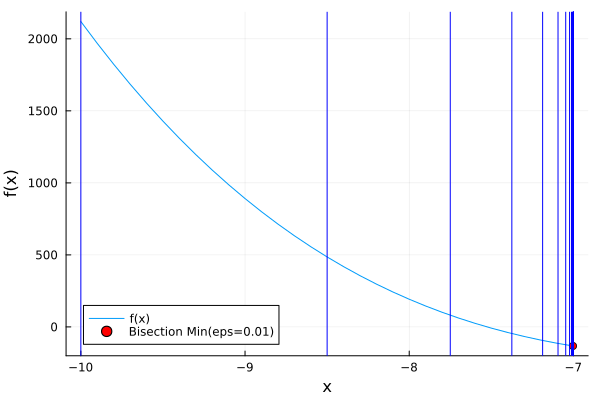

In [7]:
using Plots

f(x) = x^4 + 8x^3 - 6x^2 - 72x

a = -10
b = -7
accurances = [0.1, 0.01, 0.001]  # Различная точность
acc = 0.01

x_bisection, y_bisection, intervals, iters_bisection = bisection(f, a, b, acc) 

xs = a:0.1:b
ys = f.(xs)

Plots.plot(xs, ys, label="f(x)", xlabel="x", ylabel="f(x)")
    
scatter!([x_bisection], [y_bisection], label="Bisection Min(eps=$acc)", color=:red)

for (i, interval) in enumerate(intervals)
    vline!([interval[1], interval[2]], color=:blue, label="")
end

Plots.plot!()

In [8]:
println("Количество итераций методом дихотомии на интервале [$a, $b]: ", iters_bisection)

Количество итераций методом дихотомии на интервале [-10, -7]: 9


Метод золотого сечения для поиска минимума

In [9]:
function golden_section(f, a, b, eps)
    k = (sqrt(5) - 1) / 2
    x1 = a + (1 - k) * (b - a)
    x2 = a + k * (b - a)
    a = Float64(a)
    b = Float64(b)
    intervals = [(a,b)]
    iters = 0
    while abs(x1 - x2) > eps
        iters += 1
        if f(x1) <= f(x2)
            b = x2
            x2 = x1
            x1 = a + b - x1
        else
            a = x1
            x1 = x2
            x2 = a + b - x2
        end
        push!(intervals, (x1,x2))
    end
    min = (a + b) / 2
    return min, f(min), intervals, iters
end

f(x) = x^4 + 8*x^3 - 6*x^2 - 72*x

a = -10
b = -7
eps = 0.01

x_minimum, y_minimun, intervals, iters_golden = golden_section(f, a, b, eps)
println("Минимум функции на интервале [$a, $b]: ", x_minimum)


Минимум функции на интервале [-10, -7]: -7.01973342624464


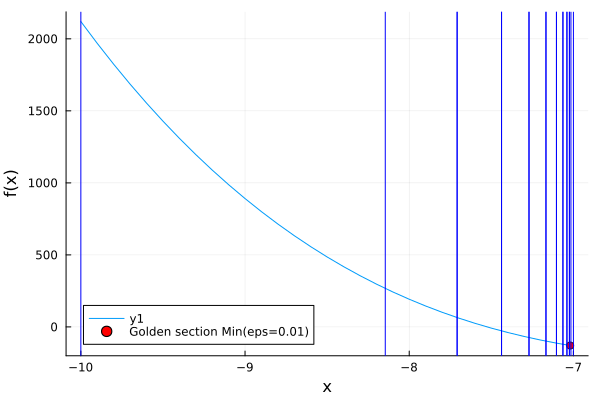

In [10]:
using Plots

f(x) = x^4 + 8x^3 - 6x^2 - 72x

a = -10
b = -7
acc = 0.01

x_golden, y_golden, intervals, iters_golden = golden_section(f, a, b, acc) 

xs = a:0.1:b
ys = f.(xs)

Plots.plot(xs, ys, xlabel="x", ylabel="f(x)")
    
scatter!([x_golden], [y_golden], label="Golden section Min(eps=$acc)", color=:red)

for (i, interval) in enumerate(intervals)
    vline!([interval[1], interval[2]], color=:blue, label="")
end

Plots.plot!()

In [11]:
println("Количество итераций методом золотого сечения на интервале [$a, $b]: ", iters_golden)

Количество итераций методом золотого сечения на интервале [-10, -7]: 9


Метод Фибоначчи для поиска минимума

In [ ]:
function fibonacci(n)
    if n == 1 || n == 2
        return 1
    end
    return fibonacci(n - 1) + fibonacci(n - 2)
end

function fibonacci_search(f, a, b, eps)
    
    n = (b - a)  ÷ eps
    n = n + 1
#   n = 10
    fib = [fibonacci(i) for i in 1:n]  # Генерация чисел Фибоначчи
    
    x1 = a + (fib[n-2] / fib[n]) * (b - a)
    x2 = a + (fib[n-1] / fib[n]) * (b - a)
    
    a = Float64(a)
    b = Float64(b)
    intervals = [(a,b)]
    iters = 0
    for k in 1:(n-3)
        iters += 1
        if f(x1) > f(x2)
            a = x1
            x1 = x2
            x2 = a + (fib[n-k-1] / fib[n-k]) * (b - a)
        else
            b = x2
            x2 = x1
            x1 = a + (fib[n-k-2] / fib[n-k]) * (b - a)
        end
        push!(intervals, (a,b))
    end
    min = (a + b) / 2
    return min, f(min), intervals, iters
end

f(x) = x^4 + 8*x^3 - 6*x^2 - 72*x

a = -10
b = -7
eps = 0.01

x_minimum, y_minimum, intervals, iters_fibonacci = fibonacci_search(f, a, b, eps)
println("Минимум функции на интервале [$a, $b]: ", x_minimum)


In [ ]:
using Plots

f(x) = x^4 + 8x^3 - 6x^2 - 72x

a = -10
b = -7
acc = 0.01

x_fibonacci, y_fibonacci, intervals, iters_fibonacci = fibonacci_search(f, a, b, acc) 

xs = a:0.1:b
ys = f.(xs)

Plots.plot(xs, ys, xlabel="x", ylabel="f(x)")
    
scatter!([x_fibonacci], [y_fibonacci], label="Fibonacci Min(eps=$acc)", color=:red)

for (i, interval) in enumerate(intervals)
    vline!([interval[1], interval[2]], color=:blue, label="")
end

Plots.plot!()

In [ ]:
println("Количество итераций методом Фибоначчи на интервале [$a, $b]: ", iters_fibonacci)

In [ ]:
b = -7
a = -10
n = (b - a) ÷ eps
n = n + 1
n

In [14]:
function fibonacci(n)
    if n == 1 || n == 2
        return 1
    end
    return fibonacci(n - 1) + fibonacci(n - 2)
end

function fibonacci_search(f, a, b, eps)

fib = [1, 1]

while fib[end] < (b - a) / eps
push!(fib, fib[end] + fib[end-1])
end

n = length(fib) - 1

fib = [fibonacci(i) for i in 1:n] # Генерация чисел Фибоначчи

x1 = a + (fib[n-2] / fib[n]) * (b - a)
x2 = a + (fib[n-1] / fib[n]) * (b - a)

a = Float64(a)
b = Float64(b)
intervals = [(a,b)]
iters = 0
for k in 1:(n-3)
iters += 1
if f(x1) > f(x2)
a = x1
x1 = x2
x2 = a + (fib[n-k-1] / fib[n-k]) * (b - a)
else
b = x2
x2 = x1
x1 = a + (fib[n-k-2] / fib[n-k]) * (b - a)
end
push!(intervals, (a,b))

end
min = (a + b) / 2
return min, f(min), intervals, iters
end

fibonacci_search (generic function with 1 method)

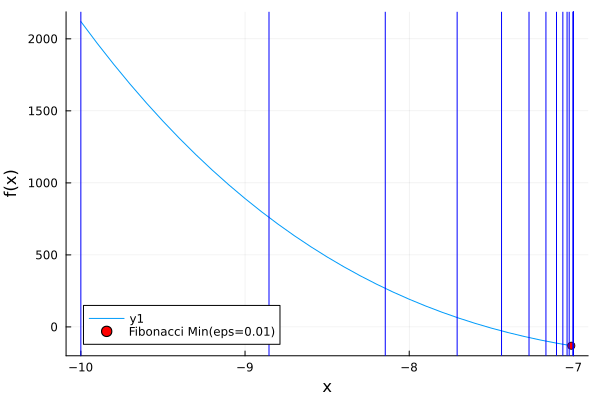

In [15]:
using Plots

f(x) = x^4 + 8x^3 - 6x^2 - 72x

a = -10
b = -7
acc = 0.01

x_fibonacci, y_fibonacci, intervals, iters_fibonacci = fibonacci_search(f, a, b, acc) 

xs = a:0.1:b
ys = f.(xs)

Plots.plot(xs, ys, xlabel="x", ylabel="f(x)")
    
scatter!([x_fibonacci], [y_fibonacci], label="Fibonacci Min(eps=$acc)", color=:red)

for (i, interval) in enumerate(intervals)
    vline!([interval[1], interval[2]], color=:blue, label="")
end

Plots.plot!()

In [16]:
println("Количество итераций методом Фибоначчи на интервале [$a, $b]: ", iters_fibonacci)

Количество итераций методом Фибоначчи на интервале [-10, -7]: 10
